<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px; ">
<b> Комментарий ревьюера</b>
    
Привет! Меня зовут Светлана Носова, я проверяла твой первый проект и буду проверять этот.  

Напомню про цветовую разметку.
    
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Зеленым отмечены отличные решения и идеи, которые можно и нужно использовать в будущем.
</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Желтым отмечено то, что можно или нужно оптимизировать, в зависимости от контекста.</div>    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Красным  обозначены пропущенные пункты задания и ошибки, которые обязательно надо будет исправить, чтобы результаты были верные.</div> 
    
Снова **ответы на мои комментарии или доработки по моим рекомендациям попрошу выделить каким-нибудь цветом, кроме трех перечисленных.**
Также я попрошу тебя **не менять и не передвигать мои комментарии**, чтобы при последующей проверке мне было проще ориентироваться.
            
<hr>
    
**По проекту:** отличная работа, молодец :) Верно выбран аткуальный период, хотя при проверке гипотез ты про него забываешь. Очень здорово прописаны выводы, промежуточные и общий. Хорошая аналитическая составляющая и легко читаемый код. Несколько моментов только надо подправить, в остальном все хочешь хорошо :) 
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера 2</b>
    
Новые комментарии обозначены цифрой 2. Отличная работа :) Проект я могу принять. Желаю успехов и хороших выходных :)
    

    
</div>

**Описание проекта**<br>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».<br>

**Описание данных**<br>

- Name — название игры<br>
- Platform — платформа<br>
- Year_of_Release — год выпуска<br>
- Genre — жанр игры<br>
- NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
- EU_sales — продажи в Европе (миллионы проданных копий)<br>
- JP_sales — продажи в Японии (миллионы проданных копий)<br>
- Other_sales — продажи в других странах (миллионы проданных копий)<br>
- Critic_Score — оценка критиков (максимум 100)<br>
- User_Score — оценка пользователей (максимум 10)<br>
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>

Данные за 2016 год могут быть неполными.<br>

Импорт библиотек:

**Шаг 1. Откройте файл с данными и изучите общую информацию**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

Откроем файл:

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


1. Пропуски в следующих столбцах:<br>
Name и Genre - всего по 2 пропуска<br>
Year_of_Release - 269 пропусков (1,61%)<br>
Critic_Score - 8578 пропусков (51,32%)<br>
User_Score - 6701 пропусков (40,09%)<br>
Rating - 6766 пропусков (40,48%)<br>
2. Неверные типы данных:<br>
Year_of_Release - заменить на int<br>
User_Score - заменить на float<br>
Critic_Score - заменить на int

In [4]:
for col in data:
    display ("----%s----" %col)
    display (data[col].value_counts())

'----Name----'

Need for Speed: Most Wanted    12
Madden NFL 07                   9
Ratatouille                     9
LEGO Marvel Super Heroes        9
FIFA 14                         9
                               ..
Family Party: Fitness Fun       1
Time Crisis: Crisis Zone        1
Niko Puchi Girls Runway         1
Harvest Moon: Boy & Girl        1
Meitantei Evangelion            1
Name: Name, Length: 11559, dtype: int64

'----Platform----'

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

'----Year_of_Release----'

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

'----Genre----'

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

'----NA_sales----'

0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.98       1
4.21       1
6.82       1
5.05       1
9.00       1
Name: NA_sales, Length: 402, dtype: int64

'----EU_sales----'

0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
3.59       1
4.02       1
2.24       1
2.27       1
3.75       1
Name: EU_sales, Length: 307, dtype: int64

'----JP_sales----'

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
1.16        1
2.12        1
7.20        1
2.17        1
6.50        1
Name: JP_sales, Length: 244, dtype: int64

'----Other_sales----'

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.96       1
1.93       1
0.97       1
1.37       1
1.06       1
Name: Other_sales, Length: 155, dtype: int64

'----Critic_Score----'

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

'----User_Score----'

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
1.9       2
2.3       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

'----Rating----'

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

1. Платформы:<br>
Самые популярные платформы - PlayStation2, Nintendo DS, PlayStation3 (в порядке убывания). Стоит заметить, что Nintendo DS - портативная приставка.<br>
2. Год релиза:<br>
Самые продуктивный период по количеству релизов - с 2006 по 2011 год, ежегодно выпускалось более 1000 игр, среди них стоит отметить 2008 и 2009 год - 1427 и 1426 игр соответственно. Скорее всего, это связано с пиком популярности игровых консолей, разнообразием платформ (ПК, стационарные и портативные игровые приставки и т.д.).<br>
Дальнейший спад в период 2011 - по н.в. по моему мнению связан с развитием игр на мобильных платформах (iOS, Android), которые не учтены в предоставленных данных, а также заняли нишу довольно популярных портативок (Nintendo DS, PlayStation Portable, GameBoy Advance, etc.).<br>
3. Жанр:<br>
С отрывом самые популярные жанры - Экшен и Спорт (3369 и 2348 игр соответственно). Самый не популярный - Puzzle (всего 580 игр).<br>
4. User Score:<br>
2424 игр с оценкой TBD (To Be Determined) - оценка еще не определена и будет известна позднее = оценки фактически нет. (заменим на -1)<br>
5. Рейтинг:<br>
Больше всего игр с рейтингом E(Everyone - для всех) и T(Teen - подросткам). Пропуски заменим на "-1"<br>
6. Столбцы Critic_Score и User_Score:<br>
Пропусков слишком много, заменим их на "-1", т.к. замена на что-либо другое (среднее/медиана по году и т.п.) может повлиять на правдоподобность данных.

In [5]:
display(data.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Рассматриваемый период - с 1980 по 2016 год.<br>
Самый прибыльный рынок - Северная Америка<br>
Средняя оценка - 68, медианная - 71<br>
Минимальная выручка во всех регионах - 0.0, скорее всего связано с тем, что некоторые игры не выпускались на определенные рынки.<br>

In [6]:
data.query('Name.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в названии совпадают с пропусками в жанре.<br>
Можно спокойно удалить эти две игры, никакой ценности они не представляют.

In [7]:
data.query('Year_of_Release.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
display(data.query('Name == "Madden NFL 2004"'))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [9]:
display(data.query('Name == "FIFA Soccer 2004"'))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [10]:
display(data.query('Name == "LEGO Batman: The Videogame"'))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [11]:
display(data.query('Name == "wwe Smackdown vs. Raw 2006"'))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN


In [12]:
display(data.query('Name == "Space Invaders"'))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


In [13]:
display(data.query('Name == "PDC World Championship Darts 2008"'))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6917,PDC World Championship Darts 2008,Wii,2008.0,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15953,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.0,0.00,NaN,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,tbd,E10+


In [14]:
display(data.query('Name == "Freaky Flyers"'))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10551,Freaky Flyers,PS2,2003.0,Racing,0.05,0.04,0.0,0.01,66.0,tbd,T
14532,Freaky Flyers,XB,2003.0,Racing,0.02,0.01,0.0,0.00,64.0,tbd,T
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.0,0.00,69.0,6.5,T


т.к. игры выпускаются на нескольких платформах, можно посмотреть год выпуска в повторяющихся названиях, но для других платформ, если же даты разные (как в Space Invaders), подставим самую раннюю дату выпуска - она более актуальна, т.к. та же игра, но выпущенная свежее - скорее всего лишь переиздание под новое железо, либо под новую платформу.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Хорошее решение. </div>

Проверим дубликаты, по столбцам Name, Platform и Year_of_Release (искать только по названию нельзя, т.к. игры выпускаются для разных платформ, а также может одна и та же игра на одной платформе переиздаваться, поэтому возьмем еще и год выпуска)

In [15]:
data[data.duplicated(['Name', 'Platform', 'Year_of_Release'], keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Из двух дубликатов один - это та самая игра с пропусками в названии и жанре (ее удалим отдельно), второй Madden NFL 13 оставим, т.к. какие то продажи в Европе он принес.

**Вывод:**<br>
1. Пропуски в следующих столбцах:<br>
Name и Genre - всего по 2 пропуска<br>
Year_of_Release - 269 пропусков (1,61%)<br>
Critic_Score - 8578 пропусков (51,32%)<br>
User_Score - 6701 пропусков (40,09%)<br>
Rating - 6766 пропусков (40,48%)<br>
2. Неверные типы данных:<br>
Year_of_Release - заменить на int<br>
User_Score - заменить на float<br>
3. Платформы:<br>
Самые популярные платформы - PlayStation2, Nintendo DS, PlayStation3 (в порядке убывания). Стоит заметить, что Nintendo DS - портативная приставка.<br>
4. Год релиза:<br>
Самые продуктивный период по количеству релизов - с 2006 по 2011 год, ежегодно выпускалось более 1000 игр, среди них стоит отметить 2008 и 2009 год - 1427 и 1426 игр соответственно. Скорее всего, это связано с пиком популярности игровых консолей, разнообразием платформ (ПК, стационарные и портативные игровые приставки и т.д.).<br>
Дальнейший спад в период 2011 - по н.в. по моему мнению связан с развитием игр на мобильных платформах (iOS, Android), которые не учтены в предоставленных данных, а также заняли нишу довольно популярных портативок (Nintendo DS, PlayStation Portable, GameBoy Advance, etc.).<br>
5. Жанр:<br>
С отрывом самые популярные жанры - Экшен и Спорт (3369 и 2348 игр соответственно). Самый не популярный - Puzzle (всего 580 игр).<br>
6. User Score:<br>
2424 игр с оценкой TBD (To Be Determined) - оценка еще не определена и будет известна позднее = оценки фактически нет. (заменим на -1)<br>
7. Рейтинг:<br>
Больше всего игр с рейтингом E(Everyone - для всех) и T(Teen - подросткам).<br>
8. Столбцы Critic_Score и User_Score:<br>
Пропусков слишком много, заменим их на "-1", т.к. замена на что-либо другое (среднее/медиана по году и т.п.) может повлиять на правдоподобность данных.

Рассматриваемый период - с 1980 по 2016 год.<br>
Самый прибыльный рынок - Северная Америка<br>
Средняя оценка - 68, медианная - 71<br>
Минимальная выручка во всех регионах - 0.0, скорее всего связано с тем, что некоторые игры не выпускались на определенные рынки.<br>

Пропуски в названии совпадают с пропусками в жанре.<br>
Можно спокойно удалить эти две игры, никакой ценности они не представляют.<br>

Т.к. игры выпускаются на нескольких платформах, можно посмотреть год выпуска в повторяющихся названиях, но для других платформ, если же даты разные (как в Space Invaders), подставим самую раннюю дату выпуска - она более актуальна, т.к. та же игра, но выпущенная свежее - скорее всего лишь переиздание под новое железо, либо под новую платформу.<br>

Из двух дубликатов один - это та самая игра с пропусками в названии и жанре (ее удалим отдельно), второй Madden NFL 13 оставим, т.к. какие то продажи в Европе он принес.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Отличная вводная часть.</div>

**Шаг 2. Подготовьте данные**

**Замените названия столбцов (приведите к нижнему регистру):**

In [16]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Обработайте пропуски при необходимости:**

Удалим пропуски в столбце Name (заодно и в столбце Genre):

In [17]:
data.dropna(subset = ['name'], inplace = True)
data.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Заполним пропуски в столбце year_of_release:

In [18]:
data['year_of_release'] = data.groupby('name')['year_of_release'].transform(lambda x: x.fillna(value=x.min()))
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [19]:
display(data.query('name == "Madden NFL 2004"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Можно еще заметить и то, что спортивные игры имеют год окончания сезона в своем названии. Можно это тоже попробовать использовать при заполнении пропусков. 
</div>

In [20]:
display(data.query('name == "Space Invaders"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,1994.0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


Как видим, пропуски успешно заменены на год аналогичной игры (либо выпущенной ранее других)<br>
Заполнили 123 строки из 269 - убрали почти половину пропусков, оставшиеся строки удалим - они составляют менее 1%, и неверная дата выпуска может повлиять на достоверность данных при последующем анализе.

In [21]:
data.drop(data[data['year_of_release'].isna()].index,inplace=True)
data.query('year_of_release.isna()')
data['year_of_release'].value_counts()

2008.0    1441
2009.0    1430
2010.0    1269
2007.0    1202
2011.0    1153
2006.0    1018
2005.0     948
2002.0     845
2003.0     783
2004.0     764
2012.0     662
2015.0     606
2014.0     581
2013.0     548
2016.0     502
2001.0     486
1998.0     379
2000.0     351
1999.0     339
1997.0     290
1996.0     263
1995.0     219
1994.0     122
1993.0      60
1981.0      46
1992.0      43
1991.0      42
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

Столбцы Critic_Score и User_Score:<br>
Пропусков слишком много, заменим их на "-1", т.к. замена на что-либо другое (среднее/медиана по году и т.п.) может повлиять на правдоподобность данных.<br>

User Score:<br>
2424 игр с оценкой TBD (To Be Determined) - оценка еще не определена и будет известна позднее = оценки фактически нет. (заменим на -1)

In [22]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'].value_counts()
data.query('user_score.isna()')
data['user_score'] = data['user_score'].fillna(-1)
data.query('user_score.isna()')
data['user_score'].value_counts()

-1     9027
7.8     324
8       288
8.2     279
8.3     253
       ... 
1.3       2
0.2       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [23]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['critic_score'].value_counts()
#data.query('critic_score.isna()')

-1.0     8492
 70.0     253
 71.0     252
 75.0     243
 78.0     238
         ... 
 29.0       3
 20.0       3
 13.0       1
 17.0       1
 21.0       1
Name: critic_score, Length: 82, dtype: int64

Столбец Rating оставим без изменений, т.к. неизвестно чем можно заполнить пропуски, как и другие рейтинги (ввиду индивидуальности игр)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Согласна с заменами.</div>

**Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему**

Заменим тип данных в столбцах год выпуска и оценка критиков на int, т.к. это целые числа, а user_score на float, т.к. это числа с плаваающей точкой

In [24]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data['critic_score'] = data['critic_score'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       16567 non-null int64
user_score         16567 non-null float64
rating             9868 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


**Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.**

In [25]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data)
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,NaN,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       16567 non-null int64
user_score         16567 non-null float64
rating             9868 non-null object
total_sales        16567 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Можно еще взять метод **sum** с аргументом **axis=1**.
    
</div>

```python


data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
```

**Вывод:**<br>
1) Привел названия столбцов к единому нижнему регистру<br>
2) Удалил пропуски в столбце Name и Genre<br>
3) Заполнил пропуски в столбце Year of Release - 123 строки из 269 - убрал почти половину пропусков, оставшиеся строки удалил - они составляют менее 1%, и неверная дата выпуска может повлиять на достоверность данных при последующем анализе.<br>
4) Столбцы Critic_Score и User_Score:<br>
Пропусков слишком много, заменил их на "-1", т.к. замена на что-либо другое (среднее/медиана по году и т.п.) может повлиять на правдоподобность данных.<br>
User Score:<br>
2424 игр с оценкой TBD (To Be Determined) заменил на "-1" - т.к. оценка еще не определена и будет известна позднее (т.е. оценки фактически нет)<br>
5) Столбец Rating оставил без изменений, т.к. неизвестно чем можно заполнить пропуски, как и другие рейтинги (ввиду индивидуальности игр)
6) Заменил тип данных в столбцах Year of Release и Critic_Score на int, т.к. это целые числа, а user_score на float, т.к. это числа с плаваающей точкой
7) Добавил столбец с суммарными продажами по всем регионам

**Шаг 3. Проведите исследовательский анализ данных**

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [26]:
year_pivot = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
year_pivot.columns = ['count']
display(year_pivot)

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


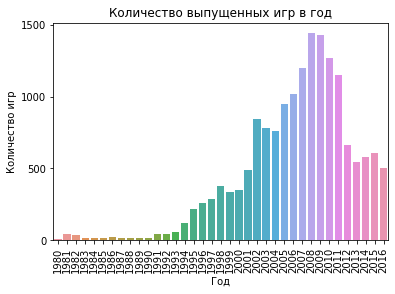

In [27]:
sns.barplot(x='year_of_release', y='count', data=year_pivot.reset_index())
plt.title("Количество выпущенных игр в год")
plt.ylabel("Количество игр")
plt.xlabel("Год")
sns.set(font_scale = 2)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (5,20)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Отличная визуализация. Уже по ней можно прикинуть актуальный период.    
</div>


Данные за все периоды не важны, т.к. расцвет игровой индустрии начался в 2002 году (прирост почти в два раза по сравнению с 2001 годом).<br>
Это связано с пиком популярности игровых консолей, разнообразием платформ (ПК, стационарные и портативные игровые приставки и т.д.).
Именно в этот период произошел прорыв - быстрыми темпами развивались технологии, за счет более мощного железа игры стали привлекательнее для широкой аудитории, ПК стали неотъемлимой частю семьи, началось бурное развитие интернета.<br>

Самый продуктивный период по количеству релизов - с 2006 по 2011 год, ежегодно выпускалось более 1000 игр, среди них стоит отметить 2008 и 2009 год - 1441 и 1430 игр соответственно.<br> 

Дальнейший спад в период 2011 - по н.в. по моему мнению связан с развитием игр на мобильных платформах (iOS, Android), которые не учтены в предоставленных данных, а также заняли нишу довольно популярных портативок (Nintendo DS, PlayStation Portable, GameBoy Advance, etc.).<br>

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

Рассмотрим платформы по суммарным продажам в порядке убывания:

In [28]:
platform_pivot = pd.pivot_table(data, index='platform', values='total_sales', aggfunc='sum')
platform_pivot = platform_pivot.sort_values('total_sales',ascending=False)
platform_pivot

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


Рассмотрим приставки с суммарными продажами свыше 500 млн:

In [29]:
top_platform_pivot = platform_pivot.query('platform in @platform_pivot.index and total_sales > 500')
top_platform_pivot

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58


Добавим разбивку по годам:

In [30]:
top_platform_pivot_year = pd.pivot_table(data, index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
top_platform_pivot_year = top_platform_pivot_year.sort_values('total_sales',ascending=False)
top_platform_pivot_year = top_platform_pivot_year.query('platform in @top_platform_pivot.index')
top_platform_pivot_year

total_sales
platform year_of_release             
PS2      2004                  211.81
         2002                  208.36
Wii      2009                  206.97
PS2      2003                  193.05
Wii      2008                  177.68
...                               ...
PS3      1991                    0.48
PS2      2011                    0.45
PS3      2005                    0.19
Wii      2016                    0.18
DS       1985                    0.02

[70 rows x 1 columns]

Сделаем график продаж в год по топ-6 приставок:

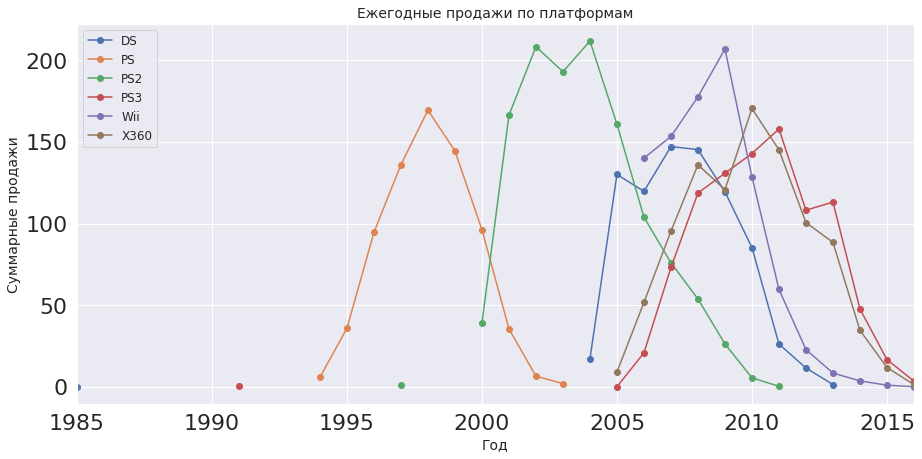

In [31]:
top_platform_pivot_year.pivot_table(index= 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(figsize = (15,7), style='o-')
plt.title("Ежегодные продажи по платформам", size=14)
plt.ylabel("Суммарные продажи", size=14)
plt.xlabel("Год", size=14)
plt.legend(loc=2, prop={'size': 12})

Платформы используются пользователями в среднем 8-10 лет, на примере Sony - новая платформа выпускается каждые 6-7 лет:<br>
Даты выхода:<br>
PS - 1994<br>
PS2 - 2000<br>
PS3 - 2006<br>
PS4 - 2013 (нет в датафрейме)<br>
PS5 - 2020 (нет в датафрейме)<br>
После выпуска новой платформы, предыдущая поддерживается еще 3-5 лет после выхода новой<br>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Верно.</div>


**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

Рассмотрим динамику продаж:

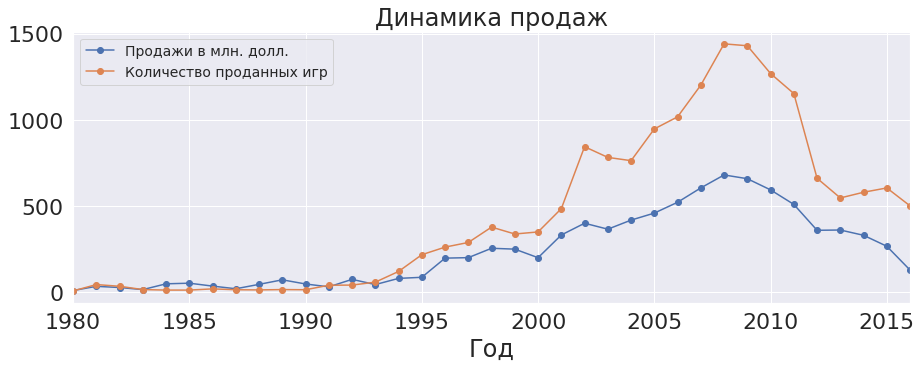

In [32]:
sales_dynamics = data.pivot_table(index=['year_of_release'], values='total_sales', aggfunc=('sum', 'count'))
sales_dynamics
sales_dynamics['sum'].plot(figsize=(15,5), style='o-', label='Продажи в млн. долл.')
sales_dynamics['count'].plot(figsize=(15,5), style='o-', label='Количество проданных игр')
plt.title("Динамика продаж")
plt.xlabel("Год")
plt.legend(prop={'size': 14})

Из приведенных графиков видно, что:<br>
1) Сейчас продажи находятся на уровне 2000-2001 года<br>
2) Количество продаваемых игр находится на уровне тех же 2000-2001 годов<br>

За актуальный период возьмем 2012-2016 годы - после продолжительного снижения показателей продаж, в это время наблюдались кратковременный рост в количестве проданных игр, а продажи в период 2012-2013 гг. перестали показывать отрицательную динамику, после чего вновь началось снижение по продажам и количеству

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Полностью согласна. Не слишком много и не слишком мало. А в 2012 году рынок как раз стабилизировался после пика продаж.</div>


In [33]:
data_new = data.query('year_of_release >= 2012')
data_new.info()
data_new

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2899 entries, 16 to 16714
Data columns (total 12 columns):
name               2899 non-null object
platform           2899 non-null object
year_of_release    2899 non-null int64
genre              2899 non-null object
na_sales           2899 non-null float64
eu_sales           2899 non-null float64
jp_sales           2899 non-null float64
other_sales        2899 non-null float64
critic_score       2899 non-null int64
user_score         2899 non-null float64
rating             1623 non-null object
total_sales        2899 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 294.4+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,NaN,0.01


**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [34]:
data_new['platform'].unique()


array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [35]:
new_platform_pivot = pd.pivot_table(data_new, index='platform', values='total_sales', aggfunc='sum')
new_platform_pivot = new_platform_pivot.sort_values('total_sales',ascending=False)
new_platform_pivot

,total_sales
platform,
PS4,314.14
PS3,289.71
X360,237.52
3DS,195.01
XOne,159.32
WiiU,82.19
PC,63.51
PSV,49.18
Wii,36.60


Лидеры списка - Sony (1 и 2 место), PS4 продано в два раза больше, чем Xbox One - ее главного конкурента<br>
Топ-5 приставок принесли суммарно более 1 млрд.долл.

In [36]:
new_platform_pivot_year = pd.pivot_table(data_new, index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
new_platform_pivot_year = new_platform_pivot_year.sort_values('total_sales',ascending=False)
new_platform_pivot_year

total_sales
platform year_of_release             
PS4      2015                  118.90
PS3      2013                  113.25
         2012                  108.28
X360     2012                  100.72
PS4      2014                  100.00
X360     2013                   88.58
PS4      2016                   69.25
XOne     2015                   60.14
3DS      2013                   56.57
XOne     2014                   54.07
3DS      2012                   51.76
PS3      2014                   47.76
3DS      2014                   43.76
X360     2014                   34.74
3DS      2015                   27.78
XOne     2016                   26.15
PS4      2013                   25.99
PC       2012                   23.45
Wii      2012                   22.94
WiiU     2014                   22.03
         2013                   21.65
XOne     2013                   18.96
WiiU     2012                   17.56
PS3      2015                   16.82
WiiU     2015                   16.35
PSV      2012                   16.19
3DS      2016                   15.14
PC       2014                   13.28
         2013                   13.01
X360     2015                   11.96
PSV      2014                   11.90
DS       2012                   11.67
PSV      2013                   10.59
Wii      2013                    8.59
PC       2015                    8.52
PSP      2012                    7.95
PSV      2015                    6.25
PC       2016                    5.25
WiiU     2016                    4.60
PSV      2016                    4.25
Wii      2014                    3.75
PS3      2016                    3.60
PSP      2013                    3.38
DS       2013                    1.54
X360     2016                    1.52
Wii      2015                    1.14
PSP      2014                    0.24
Wii      2016                    0.18
PSP      2015                    0.12

Начиная с 2013 года, PlayStation лидер продаж

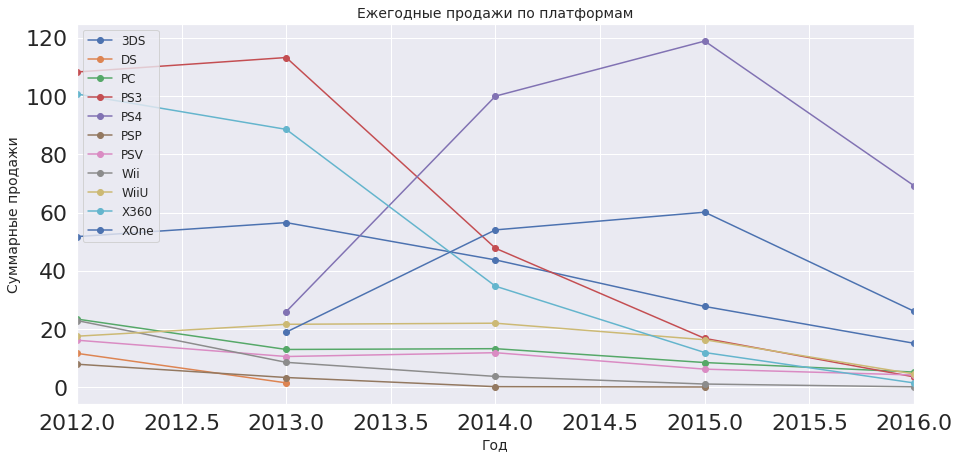

In [37]:
new_platform_pivot_year.pivot_table(index= 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(figsize = (15,7), style='o-')
plt.title("Ежегодные продажи по платформам", size=14)
plt.ylabel("Суммарные продажи", size=14)
plt.xlabel("Год", size=14)
plt.legend(loc=2, prop={'size': 12})

Учитывая, что данные за 2016 год неполные, можно сделать вывод, что:<br>
1) Продажи растут у двух платформ - PS4 и Xbox One, что вполне логично, т.к. это самое последнее поколение этих консолей на тот момент<br>
2) С выходом новых поколений PS и Xbox, соответственно, падают продажи у предыдущих поколений - PS3 и Xbox360<br>
3) Учитывая, что на 2016 год обеим приставкам было 3 года, а новое поколение выпускают в среднем раз в 6-7 лет, можно смело прогнозировать дальнейший рост продаж PS4 и Xbox One. Именно их и выберем потенциально прибыльными платформами.<br>
4) Остальные же платформы показывают довольно низкие результаты относительно лидеров рынка - WiiU, PC, PSV показывали рост продаж в 2014 г., однако в 2015 показатели вновь снизились.<br>
5) На основании того, что в среднем обновления платформ происходят через каждые 6-7 лет, можно было бы предположить, что в ближайшее время возможен выпуск новой Nintendo на замену Wii, но в нашем анализе это не нужно)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Помимо PS4 и Xbox One, я бы еще рассмотрела и 3DS, т.к. у нее все еще большие объемы продаж:</div>


In [38]:
# КОД РЕВЬЮЕРА

new_platform_pivot_year.pivot_table(index= 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').loc[[2015, 2016]]

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

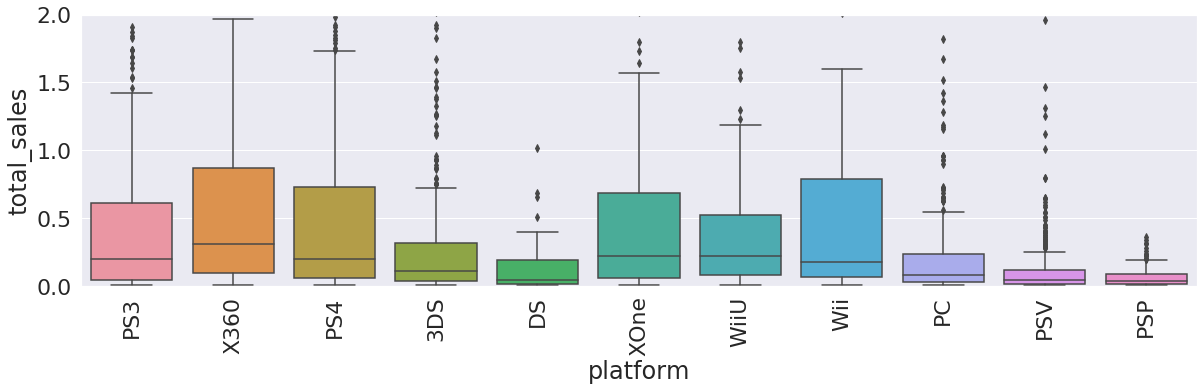

In [43]:
sns.boxplot(x='platform', y='total_sales', data=data_new) 
plt.ylim(0, 2)
plt.rcParams['figure.figsize']=(5,20)
plt.xticks(rotation=90)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Как заказчик разберется с подписями? :) Подправишь?    
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Что можно сказать про выбросы? Не все клиенты умеют правильно интерпретировать подобные диаграммы.    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Можно задать угол вращения подписям на оси методом `plt.xticks(rotation=45)`. Установи нулевой угол, чтобы они были горизонтальными. 


Правильно говоришь про выбросы. Это какие-то популярные игры. Я бы даже сказала *бестселлеры*. И это очень показательная штука. Посмотри на 3DS. Маленький ящик и много выбросов. Это говорит о том, что большАя часть объема продаж делается за счет этих выбросов. В то же время у XOne ситуация иная: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что на XOne покупают самые разные игры, причем, в немалом количестве. </div>

Определим ведущие платформы: PS3, PS4, X360m, XOne<br>
Медианные значения продаж ведущих платформ: 0,2-0,25 млн долларов.<br>
Межквартильный размах у ведуших платформ - от 0,05 до 0,75 млн долларов.<br>
Из ведущих платформ выделяется X360 - медианное значение продаж самое крупное из всех платформ, межквартильный размах от 0,1 до 0,9. <br>
Самыми прибыльными платформами являются PS3, X360, PS4, XOne. <br>
Самые худшие результаты показали PSV и PSP.<br>
Верхние границы предела, за которыми уже аномалии (популярные игры, продающиеся не один год и приносящие большую прибыль, наподобие GTA V):<br>
X360 - 2 млн.долл.<br>
PS4 - 1,75 млн.долл.<br>
XOne и Wii - 1,6 млн. долл.<br>

<span style="color:blue"> **Привет! Поправил:)**

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

Возьмем для рассмотрения платформу PlayStation4

In [39]:
ps4_data_new = data_new.query('platform =="PS4"')
ps4_data_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51,5.5,M,0.01


In [40]:
ps4_data_new = ps4_data_new.loc[:,['total_sales', 'critic_score', 'user_score']]
ps4_data_new.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.226526,0.115961
critic_score,0.226526,1.000000,0.907449
user_score,0.115961,0.907449,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fde010090>,
      dtype=object)

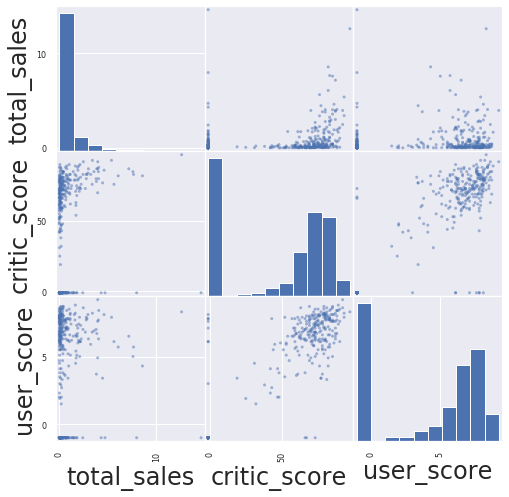

In [41]:
pd.plotting.scatter_matrix(ps4_data_new, figsize=(8,8))

Зависимость продаж от оценок критиков и пользователей незначительна (0,22 и 0,11 по корреляции соответственно).<br>
В то же время логично заметить, что лучше всего продаются игры с высоким рейтингом от критиков - скорее всего это редкие игры-хиты (такие, как GTA V, например).

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
А еще критиков меньше и они редко ставят низкие оценки. 
</div>

**Соотнесите выводы с продажами игр на других платформах.**

Соотнесем с оставшимися из топ-5 платформ по общим продажам - PS3, X360, 3DS, XOne

,total_sales,critic_score,user_score
total_sales,1.000000,0.298302,0.217594
critic_score,0.298302,1.000000,0.762820
user_score,0.217594,0.762820,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fdd07d6d0>,
      dtype=object)

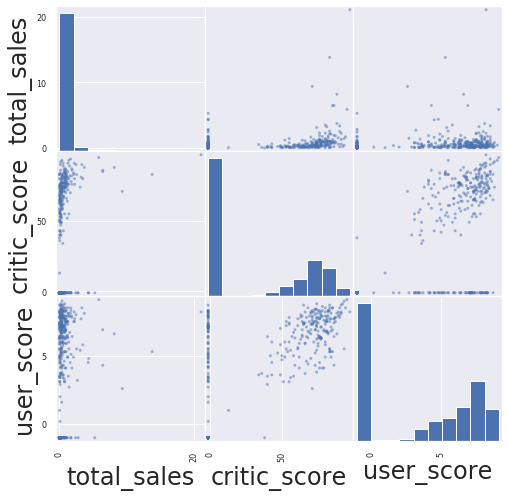

In [42]:
ps3_data_new = data_new.query('platform =="PS3"')
ps3_data_new = ps3_data_new.loc[:,['total_sales', 'critic_score', 'user_score']]
display(ps3_data_new.corr())
pd.plotting.scatter_matrix(ps3_data_new, figsize=(8,8))

,total_sales,critic_score,user_score
total_sales,1.000000,0.262023,0.105092
critic_score,0.262023,1.000000,0.643545
user_score,0.105092,0.643545,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fdd672390>,
      dtype=object)

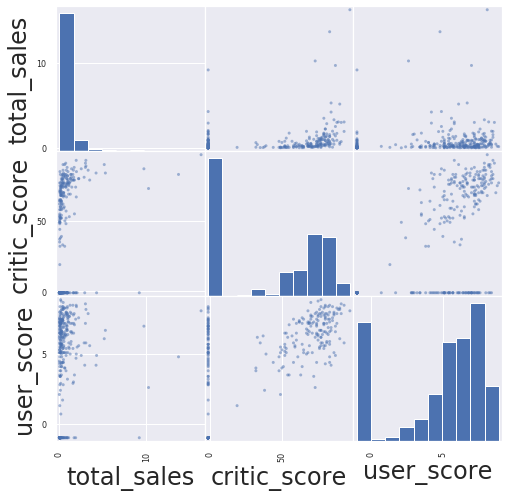

In [43]:
x360_data_new = data_new.query('platform =="X360"')
x360_data_new = x360_data_new.loc[:,['total_sales', 'critic_score', 'user_score']]
display(x360_data_new.corr())
pd.plotting.scatter_matrix(x360_data_new, figsize=(8,8))

,total_sales,critic_score,user_score
total_sales,1.000000,0.149054,0.127245
critic_score,0.149054,1.000000,0.910668
user_score,0.127245,0.910668,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fdd69b2d0>,
      dtype=object)

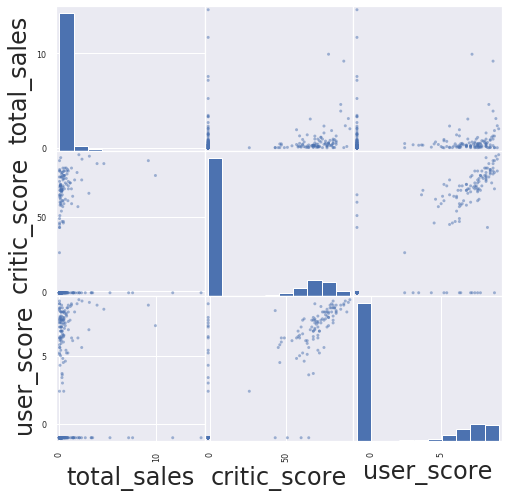

In [44]:
DS3_data_new = data_new.query('platform =="3DS"')
DS3_data_new = DS3_data_new.loc[:,['total_sales', 'critic_score', 'user_score']]
display(DS3_data_new.corr())
pd.plotting.scatter_matrix(DS3_data_new, figsize=(8,8))

,total_sales,critic_score,user_score
total_sales,1.000000,0.273782,0.121712
critic_score,0.273782,1.000000,0.781040
user_score,0.121712,0.781040,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fd421b150>,
      dtype=object)

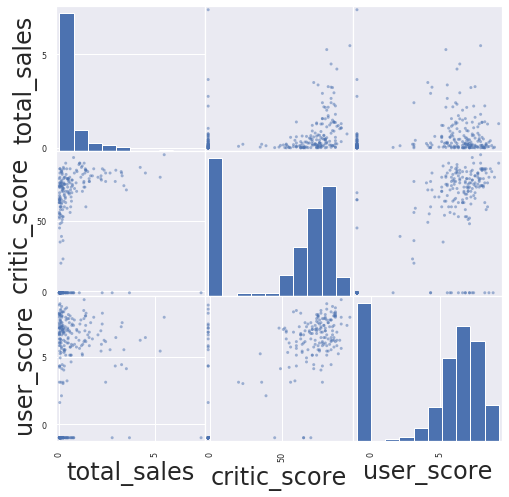

In [45]:
XOne_data_new = data_new.query('platform =="XOne"')
XOne_data_new = XOne_data_new.loc[:,['total_sales', 'critic_score', 'user_score']]
display(XOne_data_new.corr())
pd.plotting.scatter_matrix(XOne_data_new, figsize=(8,8))

По всем остальным платформам ситуация та же, что и на PS4 - Зависимость продаж от оценок критиков и пользователей незначительна.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [59]:
genres_data_new = data_new.pivot_table(index='genre', values='total_sales', aggfunc=('sum','count'))
genres_data_new = genres_data_new.sort_values(by='sum', ascending=False).reset_index()

def cnt_games(row):
    
    games = row['genre']
    count = len(data_new.query('genre==@games').name.unique())
    return count
genres_data_new['games'] = genres_data_new.apply(cnt_games, axis=1)
genres_data_new

genres_data_new['count/game'] = round(genres_data_new['count'] / genres_data_new['games'], 2)
genres_data_new['sum/game'] = round(genres_data_new['sum'] / genres_data_new['games'], 2)
genres_data_new

,genre,count,sum,games,count/game,sum/game
0,Action,1041,446.41,574,1.81,0.78
1,Shooter,237,304.75,95,2.49,3.21
2,Role-Playing,370,192.80,265,1.40,0.73
3,Sports,268,181.07,99,2.71,1.83
4,Misc,193,85.28,130,1.48,0.66
5,Platform,85,61.00,46,1.85,1.33
6,Racing,115,53.50,48,2.40,1.11
7,Fighting,109,44.49,61,1.79,0.73
8,Simulation,80,35.12,61,1.31,0.58
9,Adventure,302,29.43,216,1.40,0.14


Больше всего проданных копий и суммарных продаж (в млн долл) у жанра Экшен, но если брать в расчете на одну уникальную игру, получается следующее:<br>
1) Чаще всего в среднем продаются игры жанра Sports(2.71), за ним следуют Shooter(2.49) и Racing(2.40)<br>
2) Топ жанров в плане суммы продаж из расчета на одну игру - Shooter(3.21), за ним следуют Sports(1.83) и Platform(1.33)<br>

Из этого можно сделать вывод, что среди жанров Shooter и Sports много бестселлеров, а первое место жанра Action по общим показателям количества проданных копий и выручки достигнуто за счет большого разнообразия игр этого жанра (Например, у жанра шутер представлено в 6 раз меньше игр, нежели у жанра экшен, а суммарные продажи составляют почти 70% от суммы продаж жанра экшен)<br>

Аутсайдер списка - игры в жанре Puzzle, у которых много бесплатных аналогов на мобильных платформах (iOS, Android), а также скорее всего они выпускались для портативных приставок, которые показали самые низкие результаты продаж в целом.<br>

<span style="color:blue"> **Исправил:)**

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера</b>
    
Вообще, про прибыльность мы тут говорить не можем, т.к. речь идет о млн копий. Да и нет у нас информации о себестоимости. Тут немного некорректно сформулирована задача. Хорошо. А может ли быть такая ситуация, что экшн делает продажи только за счет большего количества игр и большого количества бестселлеров? Быть может, другие жанры имеют больше продаж в расчете на единицу игры. Сделай то же самое, но с медианными/средними  продажами.
</div>

**Вывод:**<br>
Расцвет игровой индустрии начался в 2002 году (прирост почти в два раза по сравнению с 2001 годом).<br>
Это связано с пиком популярности игровых консолей, разнообразием платформ (ПК, стационарные и портативные игровые приставки и т.д.).
Именно в этот период произошел прорыв - быстрыми темпами развивались технологии, за счет более мощного железа игры стали привлекательнее для широкой аудитории, ПК стали неотъемлимой частю семьи, началось бурное развитие интернета.<br>

Самый продуктивный период по количеству релизов - с 2006 по 2011 год, ежегодно выпускалось более 1000 игр, среди них стоит отметить 2008 и 2009 год - 1441 и 1430 игр соответственно.<br> 
Дальнейший спад в период 2011 - по н.в. по моему мнению связан с развитием игр на мобильных платформах (iOS, Android), которые не учтены в предоставленных данных, а также заняли нишу довольно популярных портативок (Nintendo DS, PlayStation Portable, GameBoy Advance, etc.).<br>

Платформы используются пользователями в среднем 8-10 лет, на примере Sony - новая платформа выпускается каждые 6-7 лет.<br>
После выпуска новой платформы, предыдущая поддерживается еще 3-5 лет после выхода новой<br>

Из графика динамики продаж видно, что:<br>
1) Сейчас продажи находятся на уровне 2000-2001 года<br>
2) Количество продаваемых игр находится на уровне тех же 2000-2001 годов<br>

За актуальный период возьмем 2012-2016 годы - после продолжительного снижения показателей продаж, в это время наблюдались кратковременный рост в количестве проданных игр, а продажи в период 2012-2013 гг. перестали показывать отрицательную динамику, после чего вновь началось снижение по продажам и количеству<br>

Учитывая, что данные за 2016 год неполные, можно сделать вывод, что:<br>
1) Продажи растут у двух платформ - PS4 и Xbox One, что вполне логично, т.к. это самое последнее поколение этих консолей на тот момент<br>
2) С выходом новых поколений PS и Xbox, соответственно, падают продажи у предыдущих поколений - PS3 и Xbox360<br>
3) Учитывая, что на 2016 год обеим приставкам было 3 года, а новое поколение выпускают в среднем раз в 6-7 лет, можно смело прогнозировать дальнейший рост продаж PS4 и Xbox One. Именно их и выберем потенциально прибыльными платформами.<br>
4) Остальные же платформы показывают довольно низкие результаты относительно лидеров рынка - WiiU, PC, PSV показывали рост продаж в 2014 г., однако в 2015 показатели вновь снизились.<br>

Определим ведущие платформы: PS3, PS4, X360m, XOne<br>
Медианные значения продаж ведущих платформ: 0,2-0,25 млн долларов.<br>
Межквартильный размах у ведуших платформ - от 0,05 до 0,75 млн долларов.<br>
Из ведущих платформ выделяется X360 - медианное значение продаж самое крупное из всех платформ, межквартильный размах от 0,1 до 0,9. <br>
Самыми прибыльными платформами являются PS3, X360, PS4, XOne. <br>
Самые худшие результаты показали PSV и PSP.<br>

По всем платформам - зависимость продаж от оценок критиков и пользователей незначительна.<br>

Больше всего проданных копий и суммарных продаж (в млн долл) у жанра Экшен, но если брать в расчете на одну уникальную игру, получается следующее:<br>
1) Чаще всего в среднем продаются игры жанра Sports(2.71), за ним следуют Shooter(2.49) и Racing(2.40)<br>
2) Топ жанров в плане суммы продаж из расчета на одну игру - Shooter(3.21), за ним следуют Sports(1.83) и Platform(1.33)<br>

Из этого можно сделать вывод, что среди жанров Shooter и Sports много бестселлеров, а первое место жанра Action по общим показателям количества проданных копий и выручки достигнуто за счет большого разнообразия игр этого жанра (Например, у жанра шутер представлено в 6 раз меньше игр, нежели у жанра экшен, а суммарные продажи составляют почти 70% от суммы продаж жанра экшен)<br>

Аутсайдер списка - игры в жанре Puzzle, у которых много бесплатных аналогов на мобильных платформах (iOS, Android), а также скорее всего они выпускались для портативных приставок, которые показали самые низкие результаты продаж в целом.<br>

**Шаг 4. Составьте портрет пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):<br>
Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [60]:
na_data = data_new.query('na_sales > 0')
na_data_platform = pd.pivot_table(na_data, index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na_data_platform

,na_sales
platform,
X360,140.57
PS4,108.74
PS3,103.74
XOne,93.12
3DS,55.49
WiiU,38.10
PC,19.26
Wii,18.14
PSV,10.98


In [61]:
eu_data = data_new.query('eu_sales > 0')
eu_data_platform = pd.pivot_table(eu_data, index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_data_platform

,eu_sales
platform,
PS4,141.09
PS3,107.27
X360,74.89
XOne,51.59
3DS,42.83
PC,38.38
WiiU,25.13
Wii,12.34
PSV,11.36


In [62]:
jp_data = data_new.query('jp_sales > 0')
jp_data_platform = pd.pivot_table(jp_data, index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_data_platform

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
PSP,10.71
DS,3.72
Wii,3.39
X360,1.57


Топ-5 платформ на рынке Северной Америки: X360, PS4, PS3, XOne, 3DS<br>
Лидером является местный производитель - Microsoft.<br>

Топ-5 платформ на рынке Европы: PS4, PS3, X360, XOne, 3DS<br>
Лидером является Sony - продажи PS4 больше продаж Xbox One и Xbox360 вместе взятых.<br>

Топ-5 платформ на рынке Японии: 3DS, PS3, PSV, PS4, WiiU<br>
Лидер продаж с большим отрывом - местный производитель Nintendo с платформой 3DS - продаж больше, чем остальные платформы из топ-5 вместе взятые.<br>
Также стоит отметить:<br>
- в Японии любят портативные приставки (в топ-5 входят Nintendo 3DS, PS Vita, Nintendo Wii U)<br>
- в Японии крайне непопулярна Xbox - 1,91 млн продаж суммарно<br>
- в Японии не продаются PC-игры (во всяком случае, PC нет в списке платформ)<br>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
И правда, похоже, что японцы больше любят портативные консоли и родной рынок.
</div>

**Самые популярные жанры (топ-5). Поясните разницу.**

In [63]:
na_data_genre = pd.pivot_table(na_data, index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na_data_genre

,na_sales
genre,
Action,180.15
Shooter,144.79
Sports,81.53
Role-Playing,64.00
Misc,38.19
Platform,25.38
Fighting,19.79
Racing,17.22
Adventure,8.92


In [64]:
eu_data_genre = pd.pivot_table(eu_data, index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_data_genre

,eu_sales
genre,
Action,161.70
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29
Misc,26.32
Platform,21.41
Simulation,14.55
Fighting,10.79


In [65]:
jp_data_genre = pd.pivot_table(jp_data, index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_data_genre

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,13.10
Simulation,10.41
Fighting,9.44
Shooter,9.23
Platform,8.63
Adventure,8.24
Sports,8.01


Топ 5 жанров на рынке Северной Америке: Action, Shooter, Sports, Role-Playing и Misc<br>
Топ 5 жанров на рынке Европе: Action, Shooter, Sports, Role-Playing и Racing<br>
Топ 5 жанров на рынке Японии: Role-Playing, Action, Misc, Simulation и Fighting<br>

Пользователи в Америке и Европе предпочитают практически одинаковые жанры игр, разве что европейцы предпочитают Racing вместо Misc у американцев.<br>
В Японии первое место занимают Role-Playing Games, а Action занимает второе место, хотя в Америке и Европе был лидером с большим отрывом. Также в Японии не так любят спортивные игры и гонки, зато например любят файтинг (может, это связано с тем, что Япония является родоначальником некоторых боевых искусств?)<br>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Я бы еще отметила и то, что японцы совсем не любят популярный на Западе шутер.</div>

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера</b>
    
Здесь необходимо рассмотреть также и отсутствующий возрастной рейтинг, предварительно заменив его на маркерное значение. Эта задача является отличным примером того, что даже пропущенные значения могут нести в себе важную информацию. 
</div>

<span style="color:blue"> **Исправил:) Также после замены пропусков примерно понял суть пропущенных значений (если, конечно, мои догадки верны) в возрастном рейтинге**

Приведем описания рейтингов согласно классификации ESRB (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)<br>
E - («Everyone») — Для всех<br>
T - («Teen») — Подросткам<br>
M - («Mature») — Для взрослых<br>
E10+ - («Everyone 10 and older») — Для всех от 10 лет и старше<br>
EC - («Early childhood») — Для детей младшего возраста»<br>
K-A - ("Kids to Adults") = («Everyone») — Для всех<br>
RP - («Rating Pending») — Рейтинг ожидается<br>
AO - («Adults Only 18+») — Только для взрослых<br>

Заменим рейтинг K-A на E (т.к. это одно и то же, K-A устаревшее наименование рейтинга E), а пропуски заменим на "No Rating" для более точных результатов дальнейшего анализа.<br>

In [66]:
data_new['rating'] = data_new['rating'].fillna('No Rating')
data_new.loc[data_new['rating'] == "K-A", 'rating'] = 'E'
data_new['rating'].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


No Rating    1276
M             503
T             412
E             395
E10+          313
Name: rating, dtype: int64

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Не забывай, что предупреждения можно отключать:    
</div>

```python

import warnings
warnings.filterwarnings('ignore')
```

In [67]:
na_data_rating = pd.pivot_table(na_data, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_data_rating

,na_sales
rating,
M,231.67
E,114.37
No Rating,103.31
E10+,77.93
T,66.02


In [68]:
eu_data_rating = pd.pivot_table(eu_data, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_data_rating

,eu_sales
rating,
M,194.44
E,113.03
No Rating,91.50
E10+,57.25
T,52.96


In [69]:
jp_data_rating = pd.pivot_table(jp_data, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_data_rating

,jp_sales
rating,
No Rating,109.08
E,28.33
T,26.02
M,21.20
E10+,8.19


В Америке и Европе наибольшое количество продаж приходится на игры с рейтингом M (для взрослых, 17+).<br>
Снова выделяется Япония, где большим спросом пользуются игры без рейтинга, а после нее следуют игры с рейтигом E (для всех).<br>

Предполагаю, что большое количество пропусков в возрастном рейтинге связано с тем, что часть игр получала возрастной рейтинг не в ESRB, а в других организациях, таких как PEGI (а в предоставленных данных рейтинг именно от ESRB).<br>

Первое место в Японии игр без рейтинга объясняется тем, что выпуская игру на японский рынок, издателю необходимо получить возрастной рейтинг от местной организации CERO (Computer Entertainment Rating Organization), которая работает с 2002 года. https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization <br>
А так как она в наших данных рейтинги только по версии ESRB, вполне логично, что на первом месте в Японии игры без рейтинга (с пропущенным значением рейтинга)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>

Верно. ESRB работает только на территории СА, в Японии - CERO. Я думаю, что, с одной стороны, иностранным играм они (ESRB) не присваивают рейтинги, поскольку на них уже есть маркировка. Чтобы не было конфликта, так сказать. Так что вполне возможно, что часть игр это продукция Японии или же это корейские игры (там тоже своя организация). С другой стороны, раз они продают игры на своем рынке, то присвоение рейтинга может быть обязательным. Значит, дело еще может быть в том, что наша таблица это склейка двух таблиц: продажи на западе и на востоке. Так или иначе, это очень показательный пример. И именно разница в рынках (восточный и западный) наталкивает на мысль о неслучайности пропусков.

</div>

**Вывод:**<br>
Топ-5 платформ на рынке Северной Америки: X360, PS4, PS3, XOne, 3DS<br>
Лидером является местный производитель - Microsoft.<br>
Топ-5 платформ на рынке Европы: PS4, PS3, X360, XOne, 3DS<br>
Лидером является Sony - продажи PS4 больше продаж Xbox One и Xbox360 вместе взятых.<br>
Топ-5 платформ на рынке Японии: 3DS, PS3, PSV, PS4, WiiU<br>
Лидер продаж с большим отрывом - местный производитель Nintendo с платформой 3DS - продаж больше, чем остальные платформы из топ-5 вместе взятые.<br>
Также стоит отметить:<br>
- в Японии любят портативные приставки (в топ-5 входят Nintendo 3DS, PS Vita, Nintendo Wii U)<br>
- в Японии крайне непопулярна Xbox - 1,91 млн продаж суммарно<br>
- в Японии не продаются PC-игры (во всяком случае, PC нет в списке платформ)<br>

Топ 5 жанров на рынке Северной Америке: Action, Shooter, Sports, Role-Playing и Misc<br>
Топ 5 жанров на рынке Европе: Action, Shooter, Sports, Role-Playing и Racing<br>
Топ 5 жанров на рынке Японии: Role-Playing, Action, Misc, Simulation и Fighting<br>
Пользователи в Америке и Европе предпочитают практически одинаковые жанры игр, разве что европейцы предпочитают Racing вместо Misc у американцев.<br>
В Японии первое место занимают Role-Playing Games, а Action занимает второе место, хотя в Америке и Европе был лидером с большим отрывом. Также в Японии не так любят спортивные игры и гонки, зато например любят файтинг (может, это связано с тем, что Япония является родоначальником некоторых боевых искусств?)<br>

В Америке и Европе наибольшое количество продаж приходится на игры с рейтингом M (для взрослых, 17+).<br>
Снова выделяется Япония, где большим спросом пользуются игры без рейтинга, а после нее следуют игры с рейтигом E (для всех).<br>

Предполагаю, что большое количество пропусков в возрастном рейтинге связано с тем, что часть игр получала возрастной рейтинг не в ESRB, а в других организациях, таких как PEGI (а в предоставленных данных рейтинг именно от ESRB).<br>

Первое место в Японии игр без рейтинга объясняется тем, что выпуская игру на японский рынок, издателю необходимо получить возрастной рейтинг от местной организации CERO (Computer Entertainment Rating Organization), которая работает с 2002 года. <br>
А так как она в наших данных рейтинги только по версии ESRB, вполне логично, что на первом месте в Японии игры без рейтинга (с пропущенным значением рейтинга)

**Шаг 5. Проверьте гипотезы**

**1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Нулевая гипотеза: Средние значения пользовательского рейтинга Xbox и PC равны<br>
Альтернативная гипотеза: Средние значения пользовательского рейтинга Xbox и PC отличаются

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера</b>
    
В этом разделе, как и в остальных, надо работать внутри актуального периода.</div>

<span style="color:blue"> **Исправил:)**

In [83]:
xone_ratings = data_new[(data_new['platform'] == 'XOne') & (data_new['user_score'] > 0)]['user_score']
print('Дисперсия:', np.var(xone_ratings))
xone_ratings.describe()

Дисперсия: 1.8965188383045526


count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [84]:
pc_ratings = data_new[(data_new['platform'] == 'PC') & (data_new['user_score'] > 0)]['user_score']
print('Дисперсия:',np.var(pc_ratings))
pc_ratings.describe()

Дисперсия: 2.734138496439882


count    211.000000
mean       6.445498
std        1.657455
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

In [85]:
alpha = 0.05

results = st.ttest_ind(xone_ratings, pc_ratings, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.6206366351489678
Не получилось отвергнуть нулевую гипотезу


Пользовательские рейтинги на Xbox One:<br>
Среднее значение: 6,52<br>
Медиана: 6,80<br>
Дисперсия: 1,89<br>
Стандартное отклонение: 1,38<br>

Пользовательские рейтинги на PC:<br>
Среднее значение: 6,44<br>
Медиана: 6,80<br>
Дисперсия: 2,73<br>
Стандартное отклонение:1,65<br>

В среднем оценки отличаются на 0,08 в пользу Xbox, а медианные значения равны.<br>
Нулевую гипотезу о том, что средний значения пользовательских рейтингов на Xbox One и PC равны, отвергнуть не удалось, средние оценки равны.<br>

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые<br>
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

In [86]:
genre_action_ratings = data_new[(data_new['genre'] == 'Action') & (data_new['user_score'] > 0)]['user_score']
print('Дисперсия:', np.var(genre_action_ratings))
genre_action_ratings.describe()

Дисперсия: 1.8783732502012689


count    531.000000
mean       6.834275
std        1.371830
min        1.600000
25%        6.250000
50%        7.200000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [87]:
genre_sports_ratings = data_new[(data_new['genre'] == 'Sports') & (data_new['user_score'] > 0)]['user_score']
print('Дисперсия:', np.var(genre_sports_ratings))
genre_sports_ratings.describe()

Дисперсия: 3.0073882971729127


count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

In [88]:
alpha = 0.05

results = st.ttest_ind(genre_action_ratings, genre_sports_ratings, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.337200239591976e-20
Отвергаем нулевую гипотезу


Пользовательские рейтинги жанра Action:<br>
Среднее значение: 6.83<br>
Медиана: 7.20<br>
Дисперсия: 1.87<br>
Стандартное отклонение: 1.37<br>

Пользовательские рейтинги жанра Sports:<br>
Среднее значение: 5.45<br>
Медиана: 5.70<br>
Дисперсия: 3.00<br>
Стандартное отклонение: 1.73<br>

Средняя оценка жанра Экшен больше на 1,38 средней оценки жанра Спорт, а медианные значения жанра Экшен больше на 1,50.<br>
Нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые, отвергаем.

**ОБЩИЙ ВЫВОД:**<br>

В ходе предобрабтки данных для анализа было сделано следующее:<br>

1) Привел названия столбцов к единому нижнему регистру<br>
2) Удалил пропуски в столбце Name и Genre<br>
3) Заполнил пропуски в столбце Year of Release - 123 строки из 269 - убрал почти половину пропусков, оставшиеся строки удалил - они составляют менее 1%, и неверная дата выпуска может повлиять на достоверность данных при последующем анализе.<br>
4) Столбцы Critic_Score и User_Score:<br>
Пропусков слишком много, заменил их на "-1", т.к. замена на что-либо другое (среднее/медиана по году и т.п.) может повлиять на правдоподобность данных.<br>
User Score:<br>
2424 игр с оценкой TBD (To Be Determined) заменил на "-1" - т.к. оценка еще не определена и будет известна позднее (т.е. оценки фактически нет)<br>
5) Столбец Rating оставил без изменений, т.к. неизвестно чем можно заполнить пропуски, как и другие рейтинги (ввиду индивидуальности игр)<br>
6) Заменил тип данных в столбцах Year of Release и Critic_Score на int, т.к. это целые числа, а user_score на float, т.к. это числа с плаваающей точкой<br>
7) Добавил столбец с суммарными продажами по всем регионам<br>

Расцвет игровой индустрии начался в 2002 году (прирост почти в два раза по сравнению с 2001 годом).<br>
Это связано с пиком популярности игровых консолей, разнообразием платформ (ПК, стационарные и портативные игровые приставки и т.д.).
Именно в этот период произошел прорыв - быстрыми темпами развивались технологии, за счет более мощного железа игры стали привлекательнее для широкой аудитории, ПК стали неотъемлимой частю семьи, началось бурное развитие интернета.<br>

Самый продуктивный период по количеству релизов - с 2006 по 2011 год, ежегодно выпускалось более 1000 игр, среди них стоит отметить 2008 и 2009 год - 1441 и 1430 игр соответственно.<br> 
Дальнейший спад в период 2011 - по н.в. по моему мнению связан с развитием игр на мобильных платформах (iOS, Android), которые не учтены в предоставленных данных, а также заняли нишу довольно популярных портативок (Nintendo DS, PlayStation Portable, GameBoy Advance, etc.).<br>

**Платформы используются пользователями в среднем 8-10 лет, на примере Sony - новая платформа выпускается каждые 6-7 лет.<br>
После выпуска новой платформы, предыдущая поддерживается еще 3-5 лет после выхода новой<br>**

Из графика динамики продаж видно, что:<br>
1) Сейчас продажи находятся на уровне 2000-2001 года<br>
2) Количество продаваемых игр находится на уровне тех же 2000-2001 годов<br>

**За актуальный период возьмем 2012-2016 годы** - после продолжительного снижения показателей продаж, в это время наблюдались кратковременный рост в количестве проданных игр, а продажи в период 2012-2013 гг. перестали показывать отрицательную динамику, после чего вновь началось снижение по продажам и количеству<br>

Учитывая, что данные за 2016 год неполные, можно сделать вывод, что:<br>
1) Продажи растут у двух платформ - PS4 и Xbox One, что вполне логично, т.к. это самое последнее поколение этих консолей на тот момент<br>
2) С выходом новых поколений PS и Xbox, соответственно, падают продажи у предыдущих поколений - PS3 и Xbox360<br>
**3) Учитывая, что на 2016 год обеим приставкам было 3 года, а новое поколение выпускают в среднем раз в 6-7 лет, можно смело прогнозировать дальнейший рост продаж PS4 и Xbox One. Именно их и выберем потенциально прибыльными платформами.<br>**

Топ-5 платформ на рынке Северной Америки: X360, PS4, PS3, XOne, 3DS<br>
Лидером является местный производитель - Microsoft.<br>
Топ-5 платформ на рынке Европы: PS4, PS3, X360, XOne, 3DS<br>
Лидером является Sony - продажи PS4 больше продаж Xbox One и Xbox360 вместе взятых.<br>
Топ-5 платформ на рынке Японии: 3DS, PS3, PSV, PS4, WiiU<br>
Лидер продаж с большим отрывом - местный производитель Nintendo с платформой 3DS - продаж больше, чем остальные платформы из топ-5 вместе взятые.<br>
Также стоит отметить:<br>
- в Японии любят портативные приставки (в топ-5 входят Nintendo 3DS, PS Vita, Nintendo Wii U)<br>
- в Японии крайне непопулярна Xbox - 1,91 млн продаж суммарно<br>
- в Японии не продаются PC-игры (во всяком случае, PC нет в списке платформ)<br>

Топ 5 жанров на рынке Северной Америке: Action, Shooter, Sports, Role-Playing и Misc<br>
Топ 5 жанров на рынке Европе: Action, Shooter, Sports, Role-Playing и Racing<br>
Топ 5 жанров на рынке Японии: Role-Playing, Action, Misc, Simulation и Fighting<br>
Пользователи в Америке и Европе предпочитают практически одинаковые жанры игр, разве что европейцы предпочитают Racing вместо Misc у американцев.<br>
В Японии первое место занимают Role-Playing Games, а Action занимает второе место, хотя в Америке и Европе был лидером с большим отрывом. Также в Японии не так любят спортивные игры и гонки, зато например любят файтинг (может, это связано с тем, что Япония является родоначальником некоторых боевых искусств?)<br>

Медианные значения продаж ведущих платформ: 0,2-0,25 млн долларов.<br>
Межквартильный размах у ведуших платформ - от 0,05 до 0,75 млн долларов.<br>
Из ведущих платформ выделяется X360 - медианное значение продаж самое крупное из всех платформ, межквартильный размах от 0,1 до 0,9. <br>
Самыми прибыльными платформами являются PS3, X360, PS4, XOne. <br>
Самые худшие результаты показали PSV и PSP.<br>

По всем платформам - зависимость продаж от оценок критиков и пользователей незначительна.<br>

Больше всего проданных копий и суммарных продаж (в млн долл) у жанра Экшен, но если брать в расчете на одну уникальную игру, получается следующее:<br>
1) Чаще всего в среднем продаются игры жанра Sports(2.71), за ним следуют Shooter(2.49) и Racing(2.40)<br>
2) Топ жанров в плане суммы продаж из расчета на одну игру - Shooter(3.21), за ним следуют Sports(1.83) и Platform(1.33)<br>

Из этого можно сделать вывод, что среди жанров Shooter и Sports много бестселлеров, а первое место жанра Action по общим показателям количества проданных копий и выручки достигнуто за счет большого разнообразия игр этого жанра (Например, у жанра шутер представлено в 6 раз меньше игр, нежели у жанра экшен, а суммарные продажи составляют почти 70% от суммы продаж жанра экшен)<br>
Аутсайдер списка - игры в жанре Puzzle, у которых много бесплатных аналогов на мобильных платформах (iOS, Android), а также скорее всего они выпускались для портативных приставок, которые показали самые низкие результаты продаж в целом.<br>


В Америке и Европе наибольшое количество продаж приходится на игры с рейтингом M (для взрослых, 17+).<br>
Снова выделяется Япония, где большим спросом пользуются игры без рейтинга, а после нее следуют игры с рейтигом E (для всех).<br>
Предполагаю, что большое количество пропусков в возрастном рейтинге связано с тем, что часть игр получала возрастной рейтинг не в ESRB, а в других организациях, таких как PEGI (а в предоставленных данных рейтинг именно от ESRB).<br>

Первое место в Японии игр без рейтинга объясняется тем, что выпуская игру на японский рынок, издателю необходимо получить возрастной рейтинг от местной организации CERO (Computer Entertainment Rating Organization), которая работает с 2002 года. <br>
А так как она в наших данных рейтинги только по версии ESRB, вполне логично, что на первом месте в Японии игры без рейтинга (с пропущенным значением рейтинга)

**Из всего вышесказанного можно вывести ключевые пункты:<br>**
1) Самый прибыльный рынок - Северная Америка;<br>
2) Падает популярность портативных приставок;<br>
3) Игры на приставках намного популярнее их аналогов на PC (что, кстати, может быть связано с высоким уровнем пиратства на ПК);<br>
4) На мировом рынке две ведущие компании с большим отрывом - Sony с их PlayStation и Microsoft с Xbox;<br>
5) Платформы используются пользователями в среднем 8-10 лет, новые поколения платформ выпускаются каждые 6-7 лет. После выпуска новой платформы, предыдущая поддерживается еще 3-5 лет после выхода новой;<br>
6) Самые популярные по суммарным продажам и количеству проданных копий игровые жанры - Shooter и Sports, Action показывает хорошие результаты за счет разнообразия предоставленных игр;<br>
7) Зависимость продаж от оценок критиков и пользователей незначительна;<br>
8) Самые популярные рейтинги - М и Е (для взрослых и для всех), и что очень важно, следует рассматривать возрастные рейтинги различных организаций для полноты картины и достоверности данных;<br>
8) Из всего этого получается, что следует сделать акцент на играх жанра Action, Shooter, Sports для двух основных платформ - PS и Xbox<br>
9) Стоит обратить внимание на такой фактор, как конкурентный рынок игр на мобильных платформах iOS и Android, т.к. он уже занял нишу портативных приставок, а его быстрое развитие может повлиять на показатели рынка игр для платформ и ПК.<br>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера</b>
    
Отличный вывод! Не забудь обновить его в случае необходимости :)</div>